# Test PDPbox with multiclass classification problem
## Kaggle Otto Group with RandomForest
This demo is based on **Otto Group Product Classification Challenge**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [1]:
import pandas as pd
from pdpbox import pdp, get_dataset, info_plots

# versions
- `matplotlib`: 3.1.1
- `sklearn`: 0.23.1

In [2]:
import matplotlib
print(matplotlib.__version__)

3.1.1


In [3]:
import sklearn
print(sklearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

0.23.1


# train a simple RandomForestClassifier
We assume there is a `otto-group-product-classification-challenge` data folder under the same directory. The dataset is directly downloaded from kaggle with command `kaggle competitions download -c otto-group-product-classification-challenge`.

In [4]:
! ls otto-group-product-classification-challenge

sampleSubmission.csv  test.csv	train.csv


In [5]:
train_df = pd.read_csv('otto-group-product-classification-challenge/train.csv')
print(train_df.shape)

(61878, 95)


In [6]:
train_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [7]:
features = [
    'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10',
    'feat_11', 'feat_12', 'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19',
    'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25', 'feat_26', 'feat_27', 'feat_28',
    'feat_29', 'feat_30', 'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37',
    'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46',
    'feat_47', 'feat_48', 'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55',
    'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61', 'feat_62', 'feat_63', 'feat_64',
    'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73',
    'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_80', 'feat_81', 'feat_82',
    'feat_83', 'feat_84', 'feat_85', 'feat_86', 'feat_87', 'feat_88', 'feat_89', 'feat_90', 'feat_91',
    'feat_92', 'feat_93'
]
otto_data = train_df.copy()
uni_targets = sorted(otto_data['target'].unique())
otto_target = ['target']
for idx, value in enumerate(uni_targets):
    otto_data['target_{}'.format(idx)] = (otto_data['target'] == value).map(int)
    otto_target.append('target_{}'.format(idx))
print(otto_target)

X_train, X_test, y_train, y_test = train_test_split(
    otto_data[features], otto_data['target'], test_size = 0.2, random_state=42)

['target', 'target_0', 'target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8']


In [8]:
%%time
classifier = RandomForestClassifier(
    n_estimators=30, 
    n_jobs=4,
    random_state=42
)
classifier.fit(X_train, y_train)

CPU times: user 3.31 s, sys: 114 ms, total: 3.43 s
Wall time: 981 ms


In [9]:
classifier.score(X_test, y_test)

0.804541047188106

In [10]:
otto_features = features
otto_model = classifier

# [for internal usage] save for unit test and tutorial

# or you can directory load the data and model

In [14]:
test_otto = get_dataset.otto()
test_otto.keys()

dict_keys(['data', 'rf_model', 'features', 'target'])

In [15]:
otto_data = test_otto['data']
otto_features = test_otto['features']
otto_model = test_otto['rf_model']
otto_target = test_otto['target']

In [16]:
otto_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,target,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8
0,1,1,0,0,0,0,0,0,0,0,...,Class_1,1,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,Class_1,1,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,Class_1,1,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,Class_1,1,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,Class_1,1,0,0,0,0,0,0,0,0


# 1. single numeric feature: 'feat_67'

## 1.1 target distribution through feature 'feat_67'

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


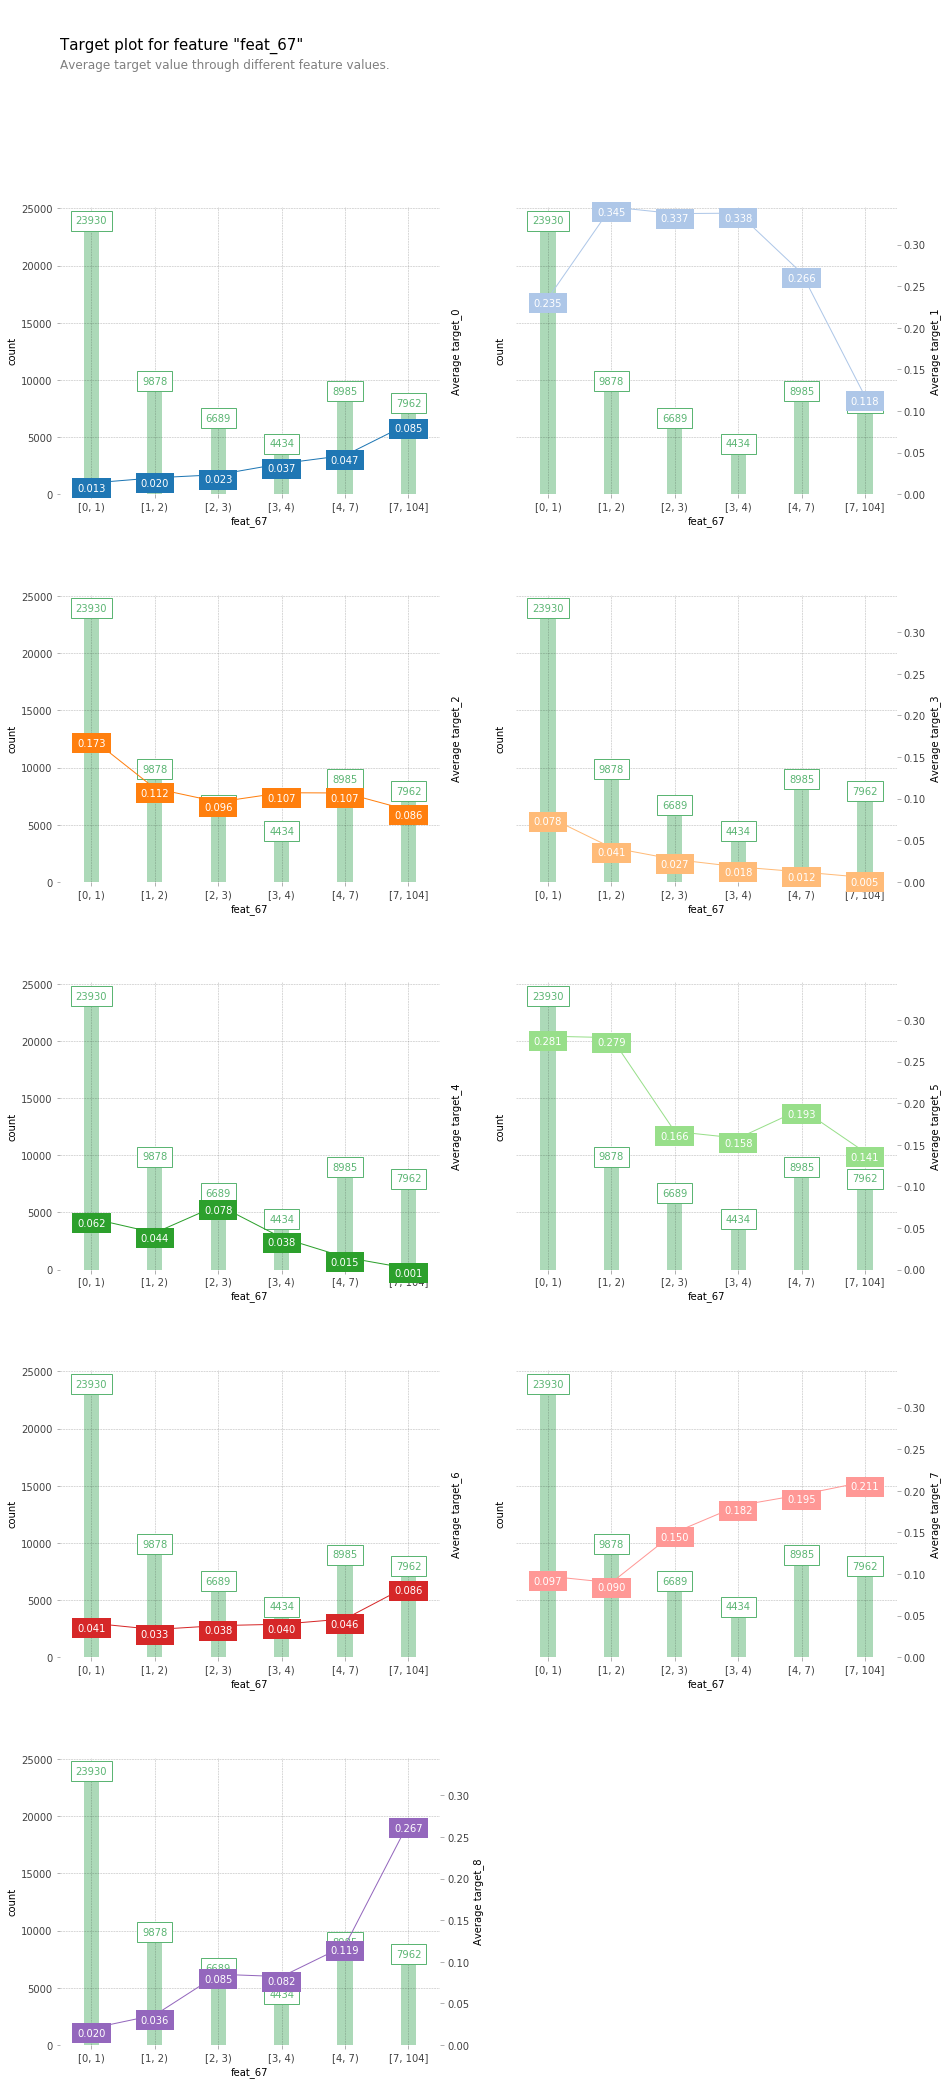

In [17]:
# default
fig, axes, summary_df = info_plots.target_plot(
    df=otto_data, feature='feat_67', feature_name='feat_67', target=otto_target[1:]
)

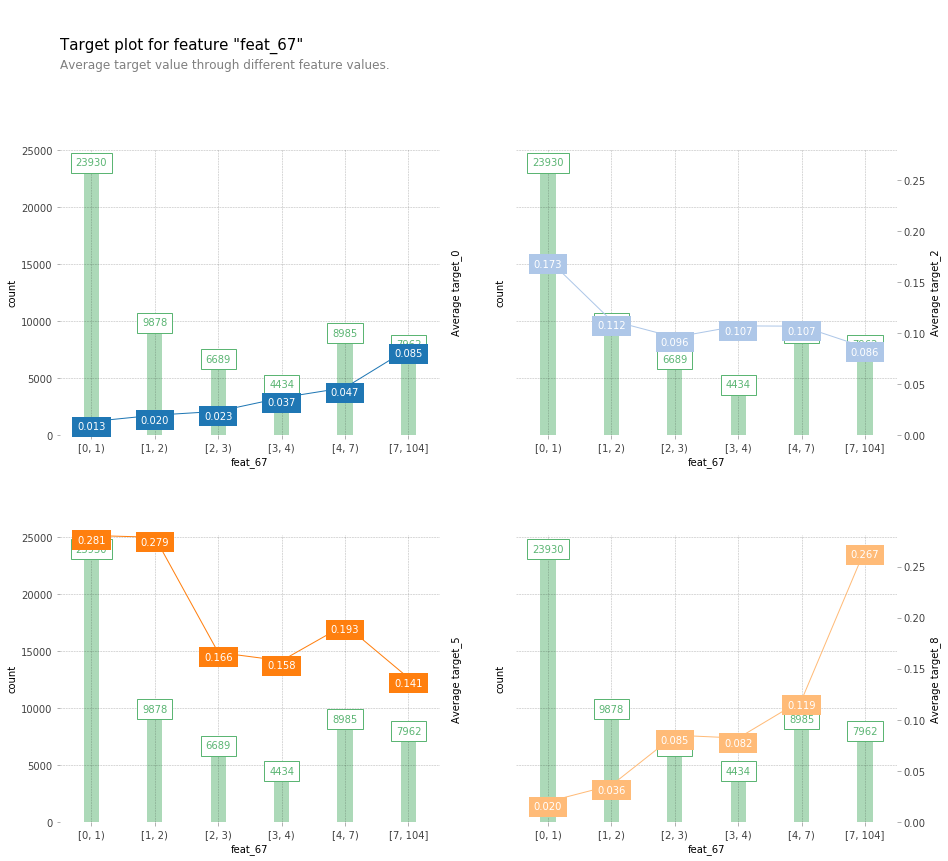

In [18]:
# select certain class
fig, axes, summary_df = info_plots.target_plot(
    df=otto_data, feature='feat_67', feature_name='feat_67', 
    target=['target_0', 'target_2', 'target_5', 'target_8']
)

In [19]:
summary_df

,x,display_column,value_lower,value_upper,count,target_0,target_2,target_5,target_8
0,0,"[0, 1)",0.0,1.0,23930,0.013414,0.172628,0.280527,0.019766
1,1,"[1, 2)",1.0,2.0,9878,0.019640,0.112371,0.278801,0.035837
2,2,"[2, 3)",2.0,3.0,6689,0.023471,0.095978,0.165944,0.084916
3,3,"[3, 4)",3.0,4.0,4434,0.036761,0.107127,0.157871,0.082093
4,4,"[4, 7)",4.0,7.0,8985,0.046633,0.106845,0.193100,0.119310
5,5,"[7, 104]",7.0,104.0,7962,0.084778,0.086159,0.141045,0.266767


## 1.2 check prediction distribution through feature 'feat_67'

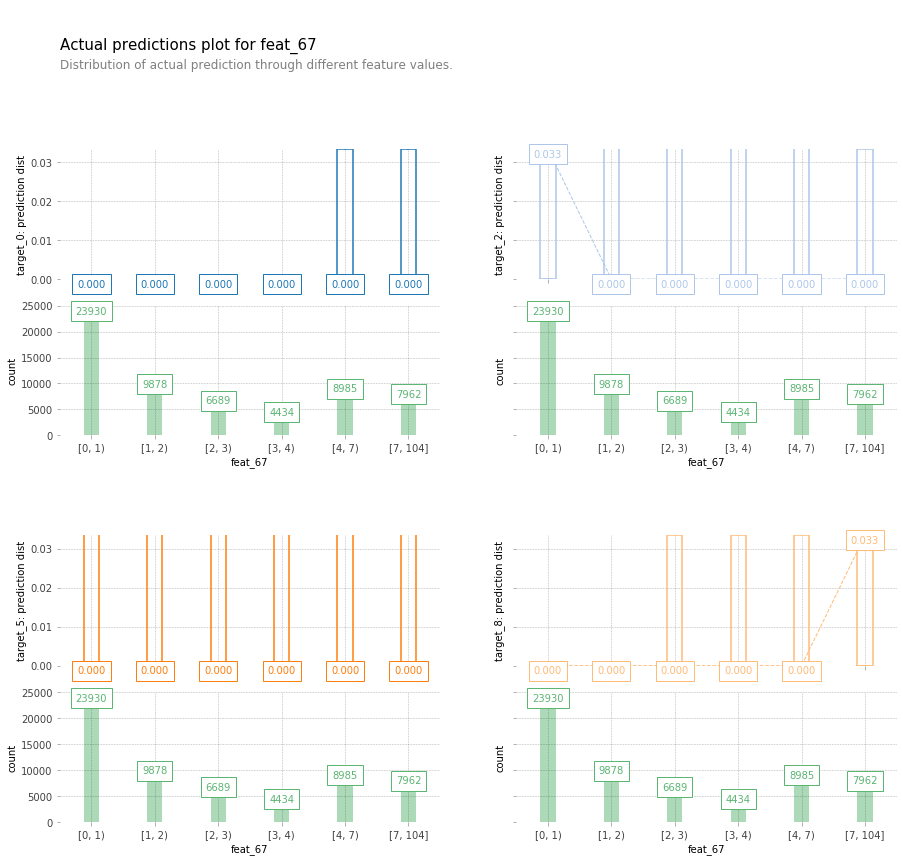

In [20]:
fig, axes, df = info_plots.actual_plot(
    model=otto_model, X=otto_data[otto_features], feature='feat_67', feature_name='feat_67', 
    which_classes=[0, 2, 5, 8]
)

In [21]:
summary_df

,x,display_column,value_lower,value_upper,count,target_0,target_2,target_5,target_8
0,0,"[0, 1)",0.0,1.0,23930,0.013414,0.172628,0.280527,0.019766
1,1,"[1, 2)",1.0,2.0,9878,0.019640,0.112371,0.278801,0.035837
2,2,"[2, 3)",2.0,3.0,6689,0.023471,0.095978,0.165944,0.084916
3,3,"[3, 4)",3.0,4.0,4434,0.036761,0.107127,0.157871,0.082093
4,4,"[4, 7)",4.0,7.0,8985,0.046633,0.106845,0.193100,0.119310
5,5,"[7, 104]",7.0,104.0,7962,0.084778,0.086159,0.141045,0.266767


## 1.3 pdp for feature 'feat_67'

In [22]:
%%time 
pdp_feat_67_rf = pdp.pdp_isolate(
    model=otto_model, dataset=otto_data, model_features=otto_features, feature='feat_67'
)

CPU times: user 5.5 s, sys: 466 ms, total: 5.96 s
Wall time: 2.66 s


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


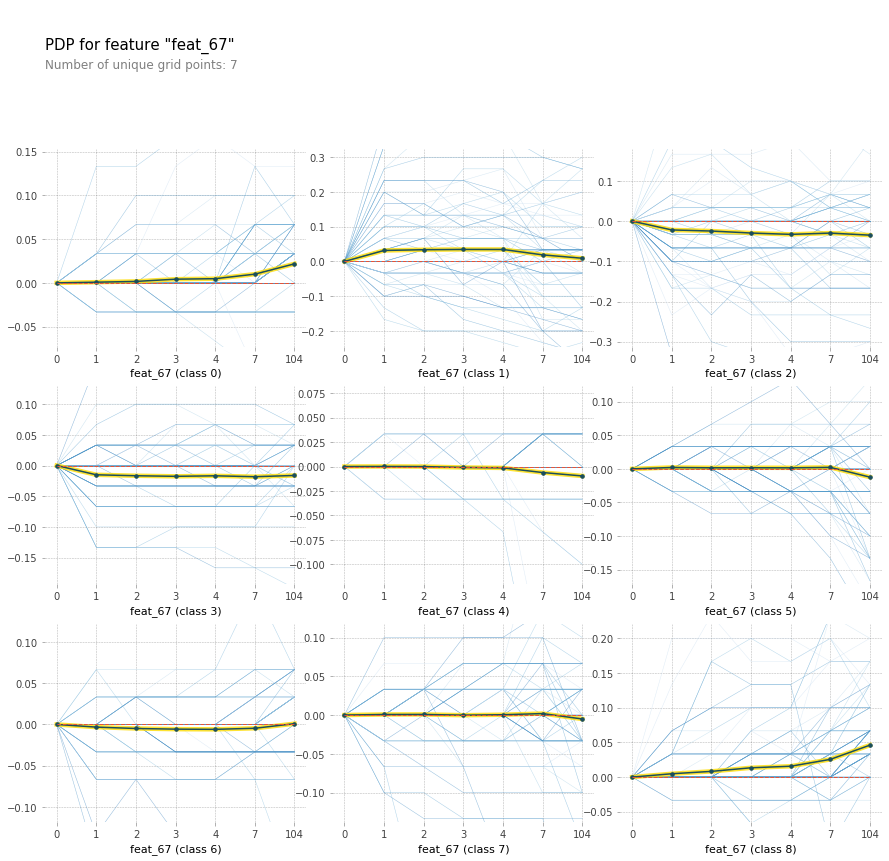

In [23]:
fig, axes = pdp.pdp_plot(
    pdp_isolate_out=pdp_feat_67_rf, feature_name='feat_67', center=True, x_quantile=True, 
    ncols=3, plot_lines=True, frac_to_plot=100
)

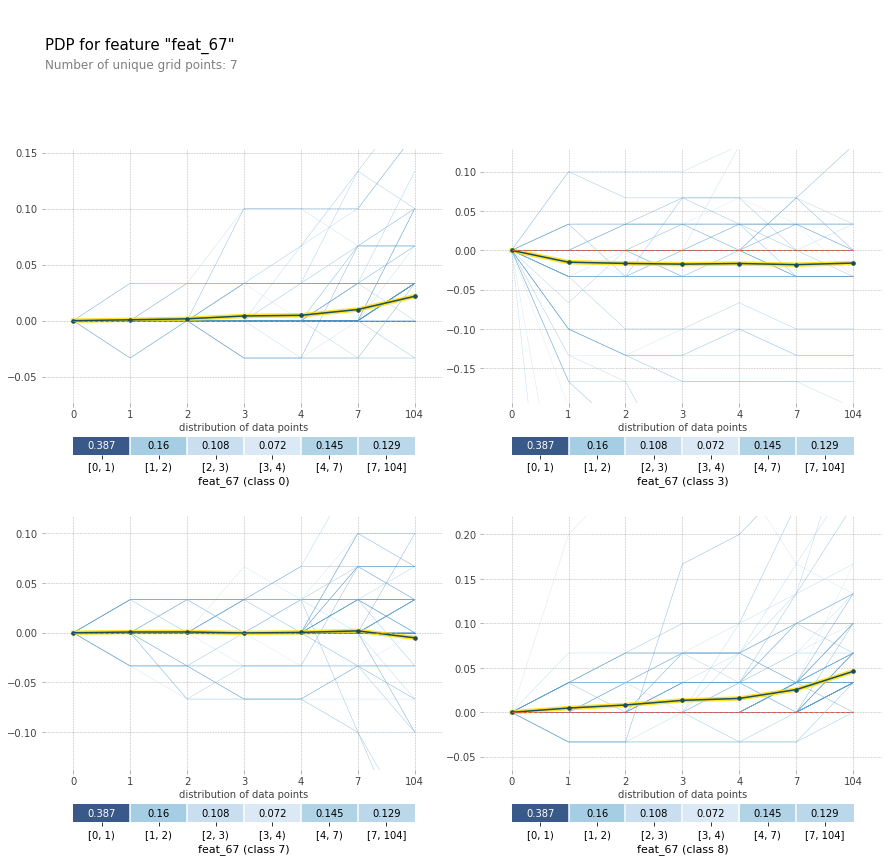

In [24]:
fig, axes = pdp.pdp_plot(
    pdp_feat_67_rf, 'feat_67', center=True, x_quantile=True, ncols=2, plot_lines=True, frac_to_plot=100,
    which_classes=[0, 3, 7, 8], plot_pts_dist=True
)

# 2. Interaction between two variables: feat_67 and feat_25

## 2.1 target distribution through feature combination of 'feat_67' and 'feat_25'

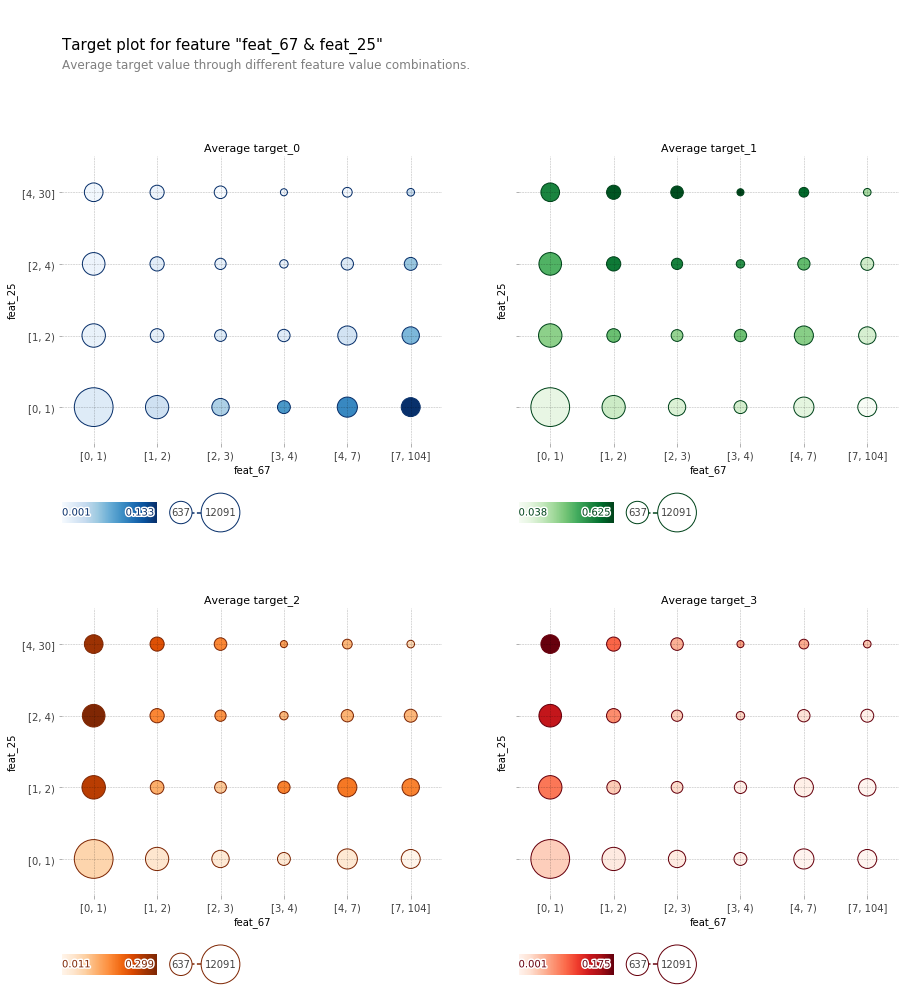

In [26]:
# default
fig, axes, summary_df = info_plots.target_plot_interact(
    df=otto_data, features=['feat_67', 'feat_25'], feature_names=['feat_67', 'feat_25'], 
    target=['target_0', 'target_1', 'target_2', 'target_3']
)

In [27]:
summary_df.head()

,x1,x2,display_column_1,display_column_2,value_lower_1,value_upper_1,value_lower_2,value_upper_2,count,target_0,target_1,target_2,target_3
0,0,0,"[0, 1)","[0, 1)",0.0,1.0,0.0,1.0,12091,0.018195,0.097924,0.074187,0.033248
1,0,1,"[0, 1)","[1, 2)",0.0,1.0,1.0,2.0,4571,0.010720,0.290527,0.249398,0.080726
2,0,2,"[0, 1)","[2, 4)",0.0,1.0,2.0,4.0,4280,0.008178,0.383178,0.299299,0.135748
3,0,3,"[0, 1)","[4, 30]",0.0,1.0,4.0,30.0,2988,0.005689,0.495649,0.272088,0.175033
4,1,0,"[1, 2)","[0, 1)",1.0,2.0,0.0,1.0,4505,0.028191,0.172919,0.046393,0.012209


## 2.2 prediction distribution through feature combination of 'feat_67' and 'feat_25'

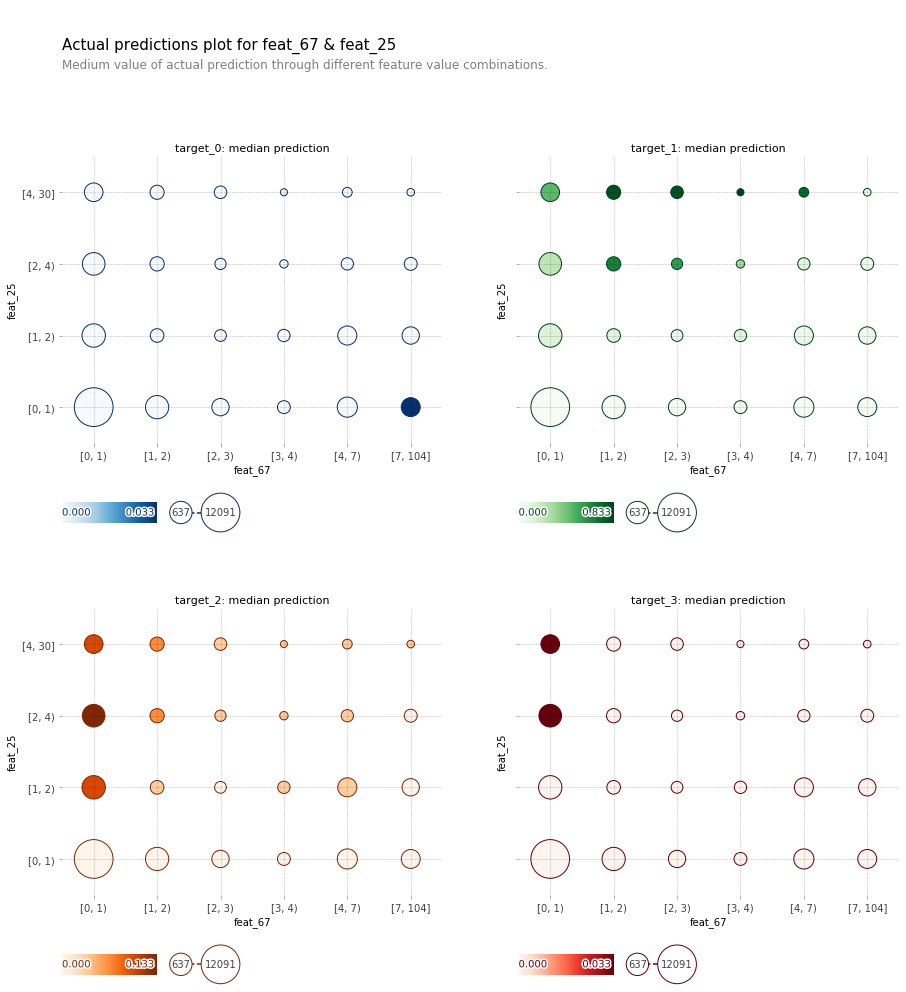

In [28]:
fig, axes, summary_df = info_plots.actual_plot_interact(
    model=otto_model, X=otto_data[otto_features], features=['feat_67', 'feat_25'], 
    feature_names=['feat_67', 'feat_25'], which_classes=[0, 1, 2, 3]
)

In [29]:
summary_df.head()

,x1,x2,display_column_1,display_column_2,value_lower_1,value_upper_1,value_lower_2,value_upper_2,count,actual_prediction_0_q1,...,actual_prediction_0_q3,actual_prediction_1_q1,actual_prediction_1_q2,actual_prediction_1_q3,actual_prediction_2_q1,actual_prediction_2_q2,actual_prediction_2_q3,actual_prediction_3_q1,actual_prediction_3_q2,actual_prediction_3_q3
0,0,0,"[0, 1)","[0, 1)",0.0,1.0,0.0,1.0,12091,0.0,...,0.0,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.0,0.000000,0.000000
1,0,1,"[0, 1)","[1, 2)",0.0,1.0,1.0,2.0,4571,0.0,...,0.0,0.000000,0.133333,0.633333,0.000000,0.100000,0.400000,0.0,0.000000,0.066667
2,0,2,"[0, 1)","[2, 4)",0.0,1.0,2.0,4.0,4280,0.0,...,0.0,0.066667,0.233333,0.766667,0.033333,0.133333,0.575000,0.0,0.033333,0.100000
3,0,3,"[0, 1)","[4, 30]",0.0,1.0,4.0,30.0,2988,0.0,...,0.0,0.133333,0.466667,0.866667,0.033333,0.100000,0.466667,0.0,0.033333,0.133333
4,1,0,"[1, 2)","[0, 1)",1.0,2.0,0.0,1.0,4505,0.0,...,0.0,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


## 2.3 pdp for feature combination of 'feat_67' and 'feat_25'

In [30]:
%%time
pdp_combo_rf = pdp.pdp_interact(
    model=otto_model, dataset=otto_data, model_features=otto_features, features=['feat_67', 'feat_25'], 
    num_grid_points=[10, 10],  percentile_ranges=[None, None], n_jobs=4
)

CPU times: user 3.65 s, sys: 3.02 s, total: 6.67 s
Wall time: 9.72 s


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


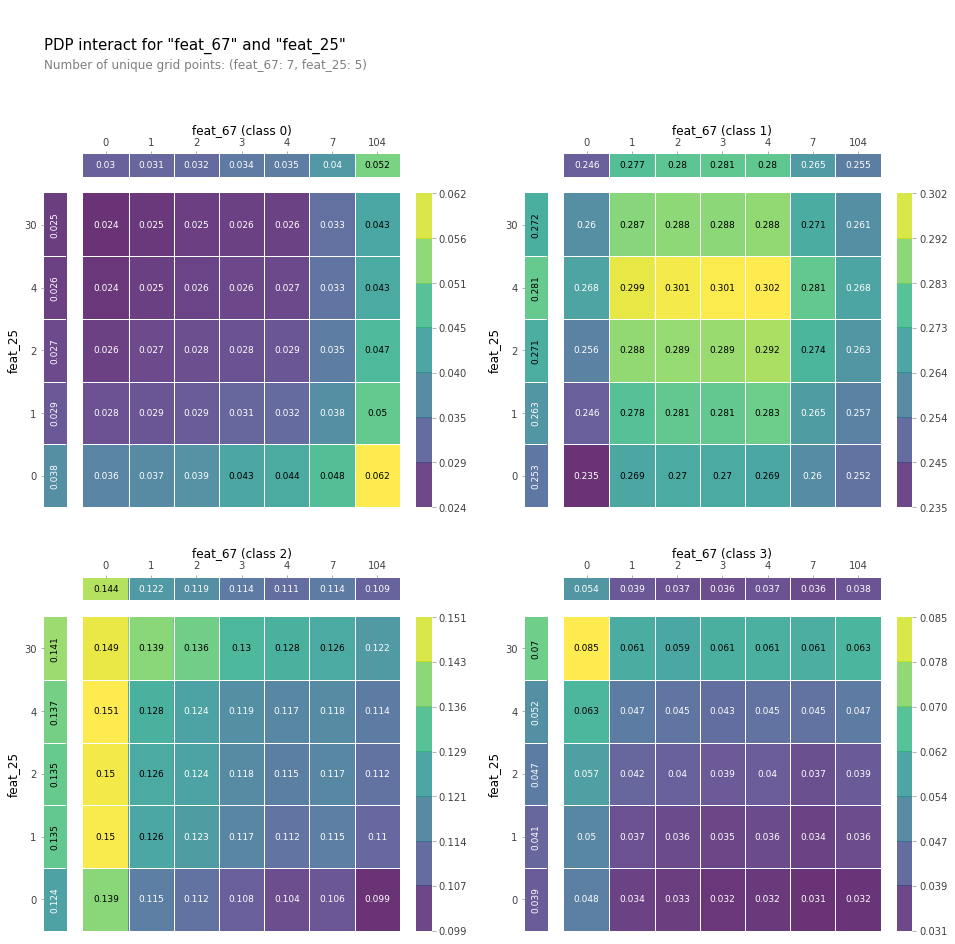

In [31]:
fig, axes = pdp.pdp_interact_plot(
    pdp_combo_rf, ['feat_67', 'feat_25'], plot_type='grid', x_quantile=True, ncols=2, plot_pdp=True, 
    which_classes=[0, 1, 2, 3]
)

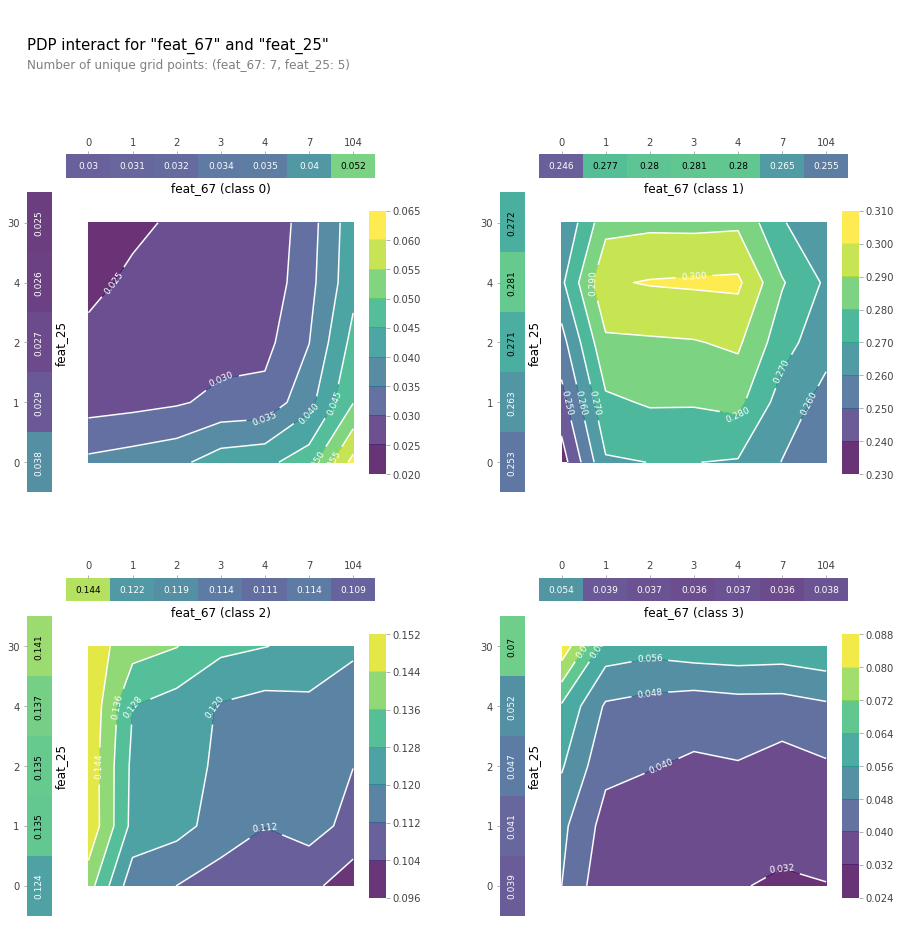

In [32]:
fig, axes = pdp.pdp_interact_plot(
    pdp_combo_rf, ['feat_67', 'feat_25'], plot_type='contour', x_quantile=True, ncols=2, 
    plot_pdp=True, which_classes=[0, 1, 2, 3]
)